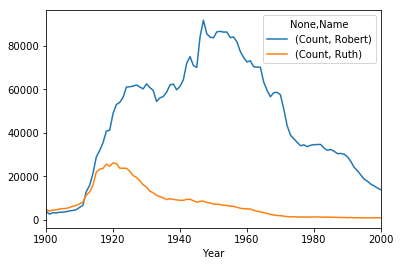

In [172]:
#Задача № 1
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
PATH = '/home/sdudakov/hw17_lecture4.1/data/'
cols = ['Name', 'Gender', 'Count']
year = 1899
names_by_year = {}
while year != 2000:
    year += 1
#     print(year)
    names_by_year[year] = pd.read_csv(PATH + 'yob{}.txt'.format(year), names = cols) 

names_all = pd.concat(names_by_year, names = ['Year', 'Pos'])

name_dynamics_cols = (names_all
                      .groupby(
                          [
                              names_all.index.get_level_values(0),
                              'Name'
                          ]
                      )
                      .sum()
                      .query('Name == ["Ruth", "Robert"]')
                      .unstack('Name')
                     ).plot()


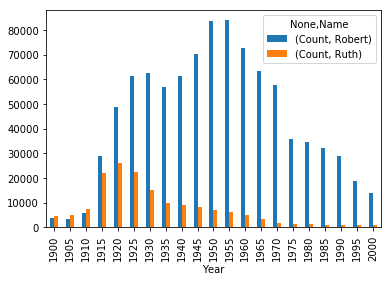

In [173]:
#Задача № 2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
PATH = '/home/sdudakov/hw17_lecture4.1/data/'
cols = ['Name', 'Gender', 'Count']
year = 1895
names_by_year = {}
while year != 2000:
    year += 5
    names_by_year[year] = pd.read_csv(PATH + 'yob{}.txt'.format(year), names = cols) 

names_all = pd.concat(names_by_year, names = ['Year', 'Pos'])

name_dynamics_cols = (names_all
                      .groupby(
                          [
                              names_all.index.get_level_values(0),
                              'Name'
                          ]
                      )
                      .sum()
                      .query('Name == ["Ruth", "Robert"]')
                      .unstack('Name')
                     ).plot.bar()

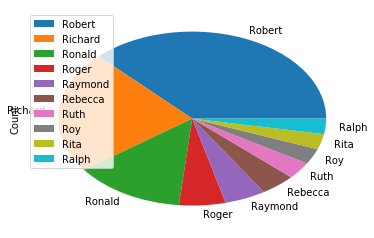

In [1]:
#Задача № 3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
PATH = '/home/sdudakov/hw17_lecture4.1/data/'
cols = ['Name', 'Gender', 'Count']
year = 1950
names_by_year = pd.read_csv(PATH + 'yob{}.txt'.format(year), names = cols)
names_by_year = names_by_year[names_by_year.Name.str.startswith('R')]

(names_by_year
 .groupby('Name')
 .sum()
 .sort_values(by='Count', ascending=False)
 .head(10)
).plot.pie(y='Count')


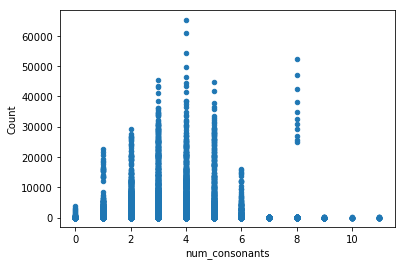

In [2]:
#Задача № 4
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
PATH = '/home/sdudakov/hw17_lecture4.1/data/'

df= pd.concat((pd.read_csv(PATH+'yob'+str(year)+'.txt', names=['Name','Gender','Count']) for year in range(1990, 2001)))
consonants = 'bcdfghjlmnpqrstvwx'
df['num_consonants'] = df.apply(lambda row: len([char for char in row.Name if char.lower() in consonants]), axis=1)

df.plot.scatter(x='num_consonants', y='Count')